# Clustering
Given the music preferences, do people make up any clusters of similar behavior?

In [1]:
import math
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("fivethirtyeight")
FIGSIZE = (16, 9)

In [2]:
path = "../data/responses_cleaned.csv"
df = pd.read_csv(path, header=0)
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5,3,2,1,2,2,1,5,5,1,...,20,163,48,1,female,right handed,college/bachelor degree,no,village,block of flats
1,4,4,2,1,1,1,2,3,5,4,...,19,163,58,2,female,right handed,college/bachelor degree,no,city,block of flats
2,5,5,2,2,3,4,5,3,5,3,...,20,176,67,2,female,right handed,secondary school,no,city,block of flats
3,5,3,2,1,1,1,1,2,2,1,...,22,172,59,1,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5,3,4,3,2,4,3,5,3,1,...,20,170,59,1,female,right handed,secondary school,no,village,house/bungalow


Let us extract the music features.

Music preferences (happen to be consecutive columns: 0 to 18)

1. I enjoy listening to music.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
2. I prefer.: Slow paced music 1-2-3-4-5 Fast paced music (integer)
3. Dance, Disco, Funk: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
4. Folk music: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
5. Country: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
6. Classical: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
7. Musicals: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
8. Pop: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
9. Rock: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
10. Metal, Hard rock: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
11. Punk: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
12. Hip hop, Rap: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
13. Reggae, Ska: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
14. Swing, Jazz: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
15. Rock n Roll: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
16. Alternative music: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
17. Latin: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
18. Techno, Trance: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
19. Opera: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)

In [3]:
music_cols = [
    'Music', 'Slow songs or fast songs', 'Dance', 'Folk',
    'Country', 'Classical music', 'Musical', 'Pop', 'Rock',
    'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska',
    'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino',
    'Techno, Trance', 'Opera'
]
df_music = df[music_cols]

print(df_music.shape)
print(df_music.columns)

(1010, 19)
Index(['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country',
       'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
       'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll',
       'Alternative', 'Latino', 'Techno, Trance', 'Opera'],
      dtype='object')


We don't need to rescale the features as all of them are in the range [0, 5].

## Visualize

Let's visualize the rating counts of each music column.

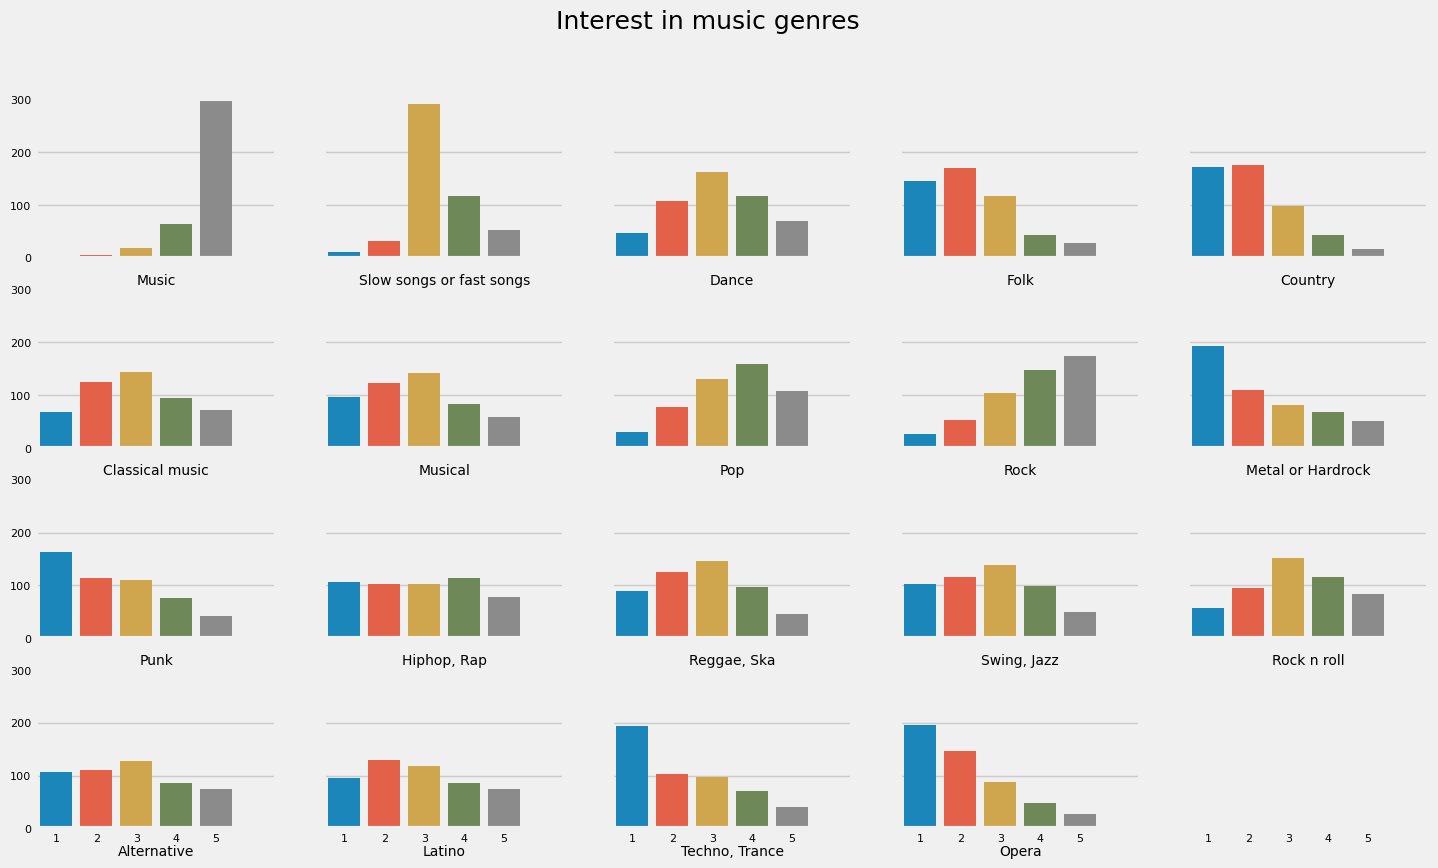

In [4]:
fig, ax = plt.subplots(4,5,figsize=FIGSIZE, sharex=True, sharey=True)
fig.suptitle("Interest in music genres", fontsize=18)
initial = 0
for i in range(4):
    for j in range(5):
        # Leave the last one blank.
        if i == 3 and j == 4:
            ax[i,j].grid(False)
            ax[i,j].set_xticklabels(labels=[1,2,3,4,5], fontsize=8)
            ax[i,j].set_yticklabels(labels=np.arange(0,601,100), fontsize=8)
            continue
        sns.countplot(df_music, x=df_music.columns[initial], ax=ax[i,j])
        ax[i,j].set_title(df_music.columns[initial], y=-0.22, fontsize=10)
        ax[i,j].set_ylabel('')
        ax[i,j].set_xlabel('')
        ax[i,j].set_xticklabels(labels=[1,2,3,4,5], fontsize=8)
        ax[i,j].set_yticklabels(labels=np.arange(0,601,100), fontsize=8)
        ax[i,j].set_xlim(-0.5, 5.5)
        ax[i,j].set_ylim(0,600)
        initial += 1

What insights can we draw from this:
- Everyone likes music!
- Most genres show a guassian behavior.
- Some genres are visibly popular: Pop, Rock.
- Some genres are visibly unpopular e.g., Folk, Country, Metal, Opera. Notably, these genres were quite popular in the previous generation.

## PCA

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=3)
df_music_pca = pd.DataFrame(pca.fit_transform(df_music.values), columns=["x", "y", "z"])

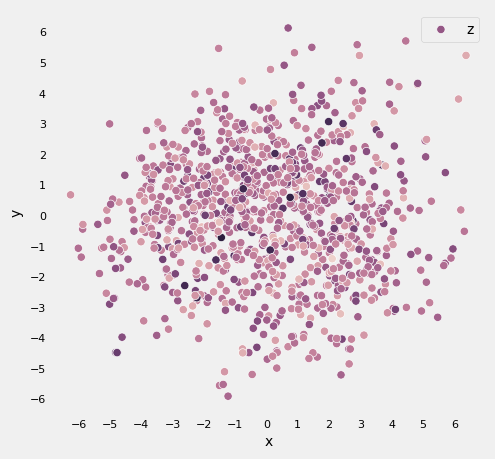

In [7]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=df_music_pca, x="x", y="y", hue="z")
plt.grid(False)
plt.xticks(range(-6,7), fontsize=8)
plt.yticks(range(-6,7), fontsize=8)
plt.xlabel("x", fontsize=10)
plt.ylabel("y", fontsize=10)
plt.legend('z',frameon=True, fontsize=10)
plt.show()

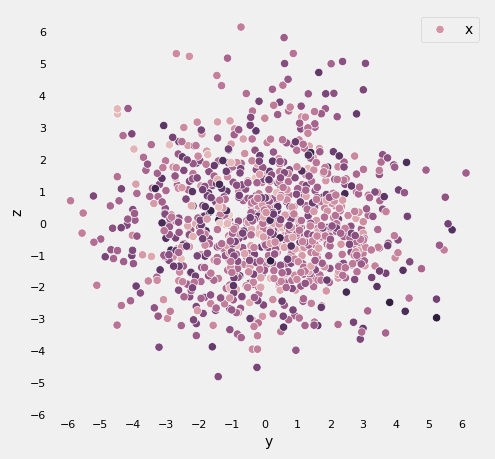

In [8]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=df_music_pca, x="y", y="z", hue="x")
plt.grid(False)
plt.xticks(range(-6,7), fontsize=8)
plt.yticks(range(-6,7), fontsize=8)
plt.xlabel("y", fontsize=10)
plt.ylabel("z", fontsize=10)
plt.legend('x',frameon=True, fontsize=10)
plt.show()

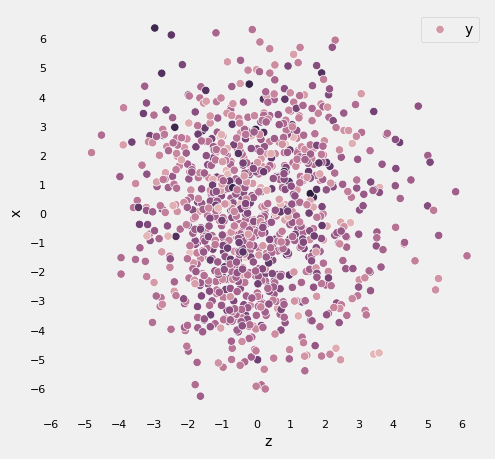

In [9]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=df_music_pca, x="z", y="x", hue="y")
plt.grid(False)
plt.xticks(range(-6,7), fontsize=8)
plt.yticks(range(-6,7), fontsize=8)
plt.xlabel("z", fontsize=10)
plt.ylabel("x", fontsize=10)
plt.legend('y', frameon=True, fontsize=10)
plt.show()

No signs of clusters in 3 dimenional data.

## Higher Dimensional Clustering
`DBSCAN` is a density based clustering algorithm. It has several merits over `K-means`.

For details refer: *D. Deng, "DBSCAN Clustering Algorithm Based on Density," 2020 7th International Forum on Electrical Engineering and Automation (IFEEA), Hefei, China, 2020, pp. 949-953, doi: 10.1109/IFEEA51475.2020.00199.*

In [10]:
from sklearn.cluster import DBSCAN

There are two parameters to the algorithm, `min_samples` and `eps`, which define formally what we mean when we say dense. Higher `min_samples` or lower `eps` indicate higher density necessary to form a cluster.

Since, `DBSCAN` uses euclidean distance as its distance metric, let us look at the distance distribution between the entries to make a calculated guess about `eps`.

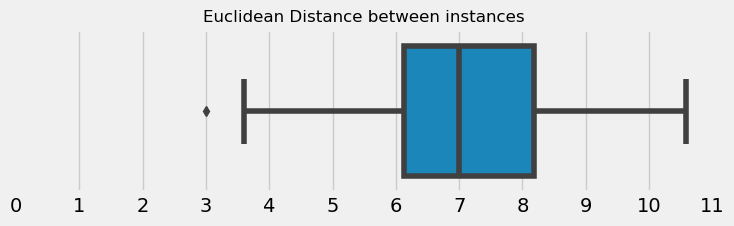

In [11]:
distances = []
for i in range(df_music.shape[1]):
    for j in range(i+1, df_music.shape[1]):
        distances.append(np.linalg.norm(df_music.iloc[i] - df_music.iloc[j]))

plt.figure(figsize=(8, 2))
plt.title("Euclidean Distance between instances", fontsize=12)
sns.boxplot(distances, orient="h")
plt.xticks(range(int(math.ceil(max(distances))) + 1))
plt.yticks([])
plt.show()

Let's try out different values of `eps` while keeping track of the #cluster, #unclustered points, cluster distribution.

In [12]:
num_clusters = {}
population_dist = {}

print("Total datapoints:", df_music.shape[0])
for i in range(1, 10):
    db = DBSCAN(eps=i, min_samples=6).fit(df_music.values)
    labels = db.labels_
    clusters, population = np.unique(labels, return_counts=True)
    unclustered = 0
    # print(i, population)
    if -1 in clusters:
        unclustered = population[0]
        clusters = clusters[1:]
        population = population[1:]
    num_clusters[i] = len(clusters)
    population_dist[i] = population

    print(
        f"Eps: {i} | #clusters = {len(clusters)}"
        f" | Clustered instances: {100 * (1 - (unclustered / len(labels))):6.2f}%"
        f" | Points per cluster: {population}"
    )

Total datapoints: 1010
Eps: 1 | #clusters = 0 | Clustered instances:   0.00% | Points per cluster: []
Eps: 2 | #clusters = 0 | Clustered instances:   0.00% | Points per cluster: []
Eps: 3 | #clusters = 8 | Clustered instances:   9.01% | Points per cluster: [43  7  6  3 14  6  6  6]
Eps: 4 | #clusters = 1 | Clustered instances:  81.19% | Points per cluster: [820]
Eps: 5 | #clusters = 1 | Clustered instances:  98.42% | Points per cluster: [994]
Eps: 6 | #clusters = 1 | Clustered instances:  99.60% | Points per cluster: [1006]
Eps: 7 | #clusters = 1 | Clustered instances:  99.90% | Points per cluster: [1009]
Eps: 8 | #clusters = 1 | Clustered instances: 100.00% | Points per cluster: [1010]
Eps: 9 | #clusters = 1 | Clustered instances: 100.00% | Points per cluster: [1010]


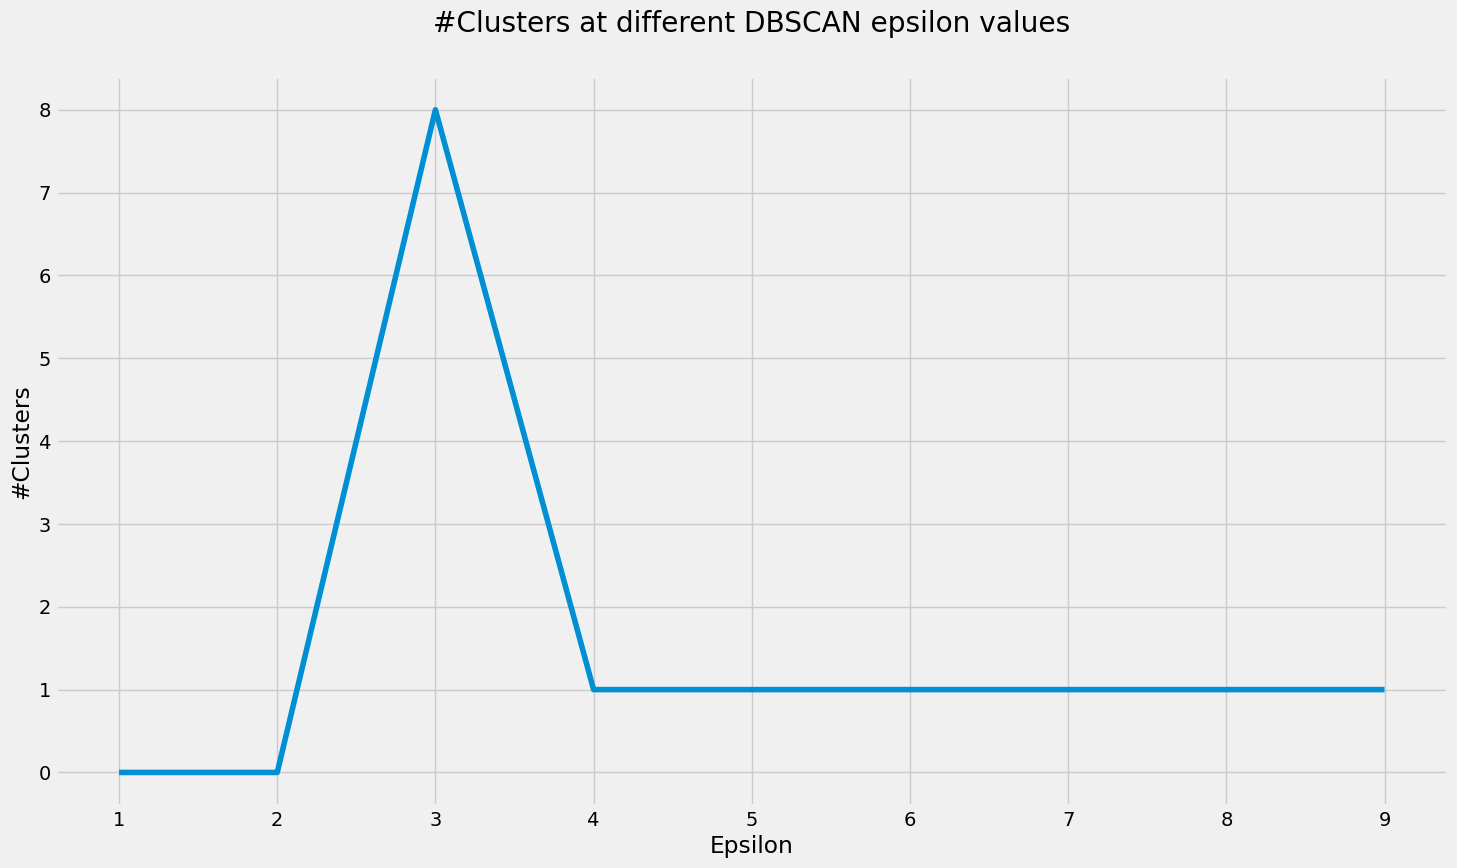

In [13]:
plt.figure(figsize=FIGSIZE)
sns.lineplot(num_clusters)
plt.title("#Clusters at different DBSCAN epsilon values", y=1.05)
plt.xlabel("Epsilon")
plt.ylabel("#Clusters")
plt.show()

In [14]:
num_clusters = {}
population_dist = {}

print("Total datapoints:", df_music.shape[0])
for j in range(5, 21):
    db = DBSCAN(eps=3, min_samples=j).fit(df_music.values)
    labels = db.labels_
    clusters, population = np.unique(labels, return_counts=True)
    unclustered = 0
    # print(i, population)
    if -1 in clusters:
        unclustered = population[0]
        clusters = clusters[1:]
        population = population[1:]
    num_clusters[j] = len(clusters)
    population_dist[j] = population

    print(
        f"min_samples: {j:2d} | #clusters = {len(clusters)}"
        f" | Clustered instances: {100 * (1 - (unclustered / len(labels))):6.2f}%"
        f" | Points per cluster: {population}"
    )

Total datapoints: 1010
min_samples:  5 | #clusters = 7 | Clustered instances:  11.29% | Points per cluster: [58  7 24  7  7  5  6]
min_samples:  6 | #clusters = 8 | Clustered instances:   9.01% | Points per cluster: [43  7  6  3 14  6  6  6]
min_samples:  7 | #clusters = 4 | Clustered instances:   5.54% | Points per cluster: [34  4  8 10]
min_samples:  8 | #clusters = 3 | Clustered instances:   4.46% | Points per cluster: [27  8 10]
min_samples:  9 | #clusters = 2 | Clustered instances:   3.47% | Points per cluster: [25 10]
min_samples: 10 | #clusters = 2 | Clustered instances:   3.47% | Points per cluster: [25 10]
min_samples: 11 | #clusters = 1 | Clustered instances:   1.98% | Points per cluster: [20]
min_samples: 12 | #clusters = 0 | Clustered instances:   0.00% | Points per cluster: []
min_samples: 13 | #clusters = 0 | Clustered instances:   0.00% | Points per cluster: []
min_samples: 14 | #clusters = 0 | Clustered instances:   0.00% | Points per cluster: []
min_samples: 15 | #clus

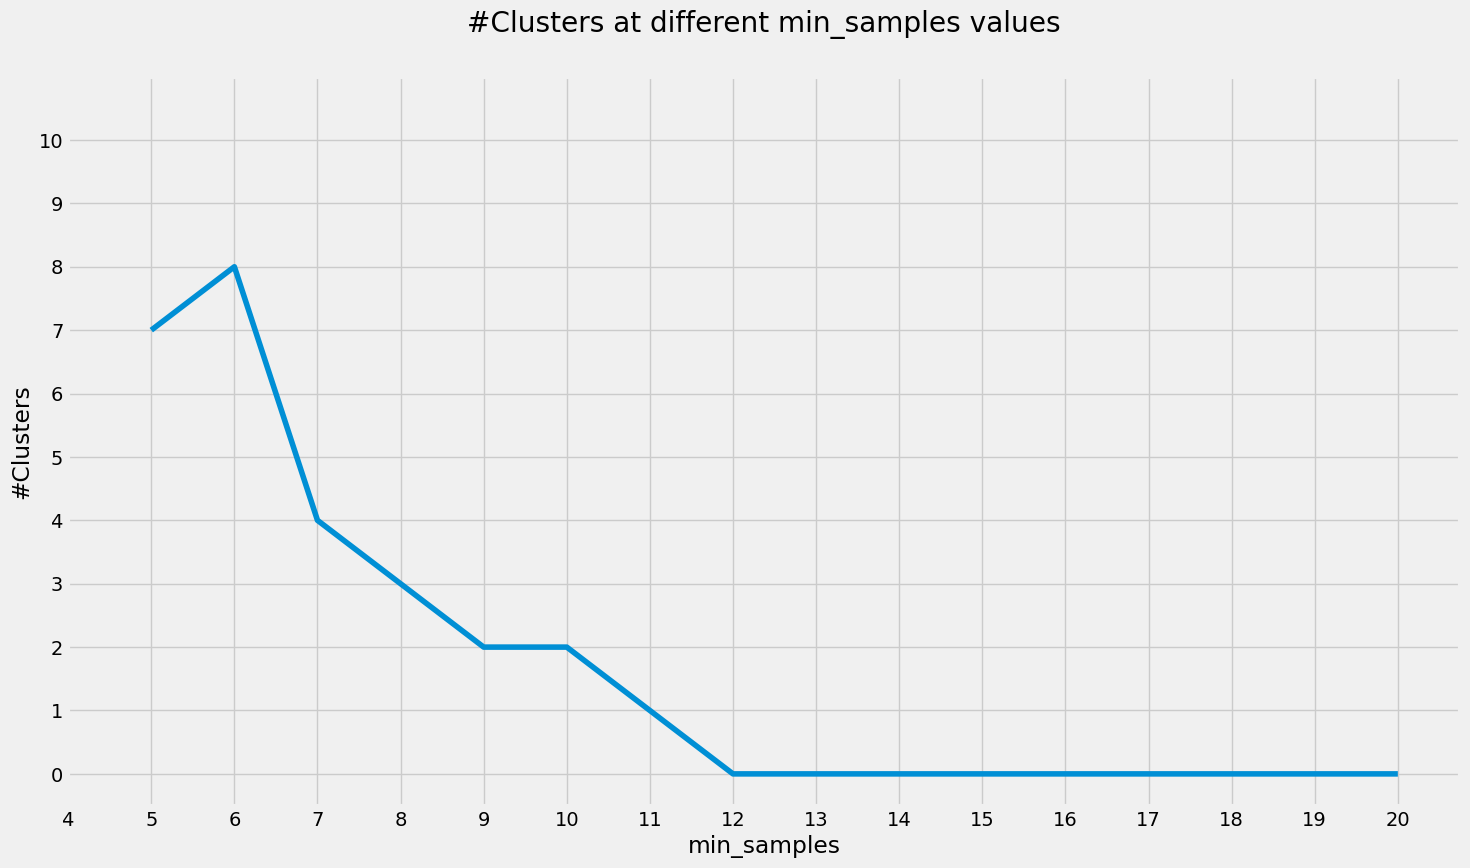

In [15]:
plt.figure(figsize=FIGSIZE)
sns.lineplot(num_clusters)
plt.title("#Clusters at different min_samples values", y=1.05)
plt.xlabel("min_samples")
plt.ylabel("#Clusters")
plt.xticks(range(4, 21))
plt.yticks(range(11))
plt.ylim(-0.5, 11)
plt.show()

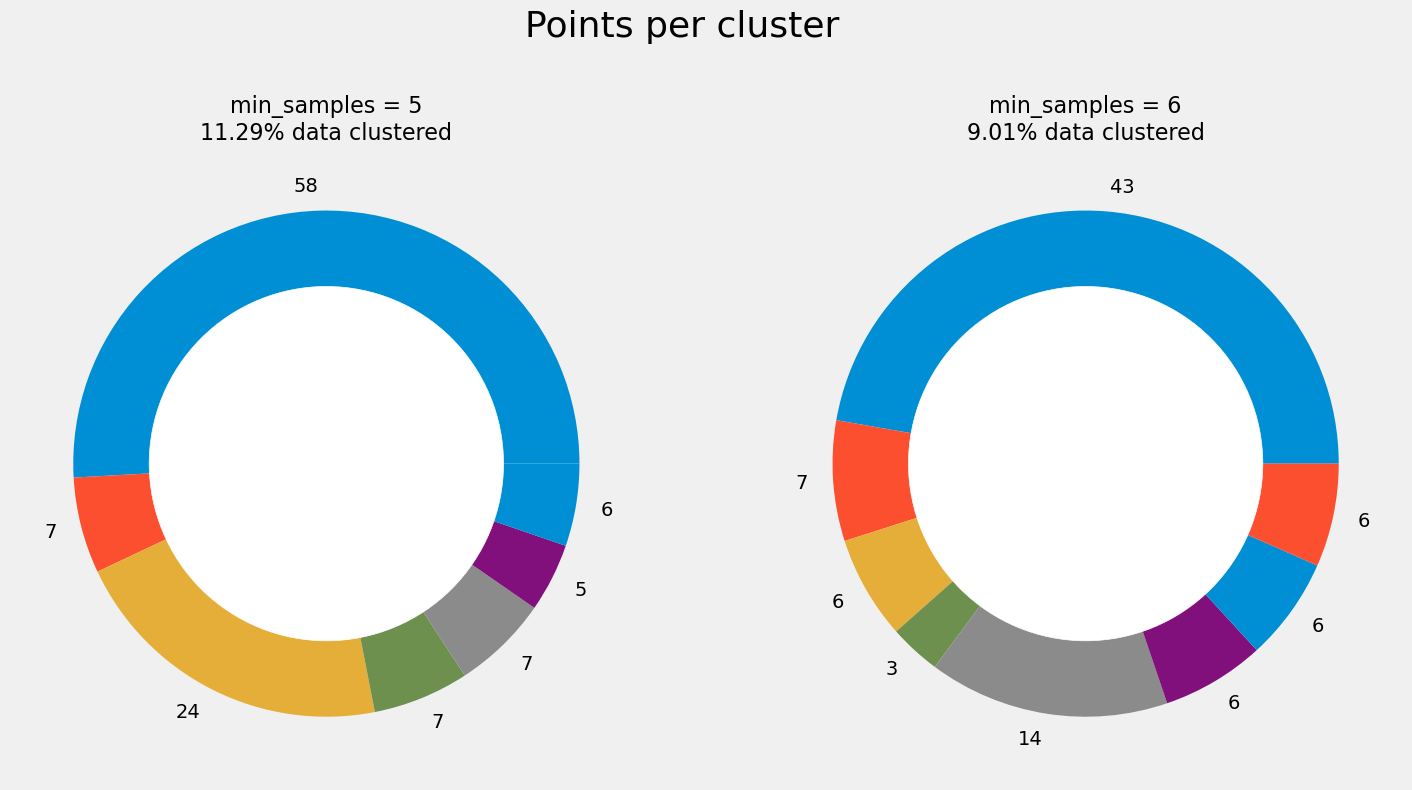

In [16]:
fig = plt.figure(figsize=FIGSIZE)
fig.suptitle("Points per cluster", fontsize=26)

plt.subplot(1,2,1)
# Create a pieplot
plt.pie(population_dist[5], labels=population_dist[5])
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title("min_samples = 5\n11.29% data clustered", fontsize=16)

plt.subplot(1,2,2)
plt.pie(population_dist[6], labels=population_dist[6])
my_circle=plt.Circle((0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title("min_samples = 6\n9.01% data clustered", fontsize=16)

plt.show()

`eps = 3.0` and `min_samples = 5` together generate the best results.

## Analyzing trends within clusters

In [17]:
db = DBSCAN(eps=3, min_samples=5).fit(df_music.values)
cluster_labels = db.labels_
df["cluster"] = cluster_labels

We shall compare the distribution of various behaviors and see if there is a distribution shift in the clusters compared to the full dataset.

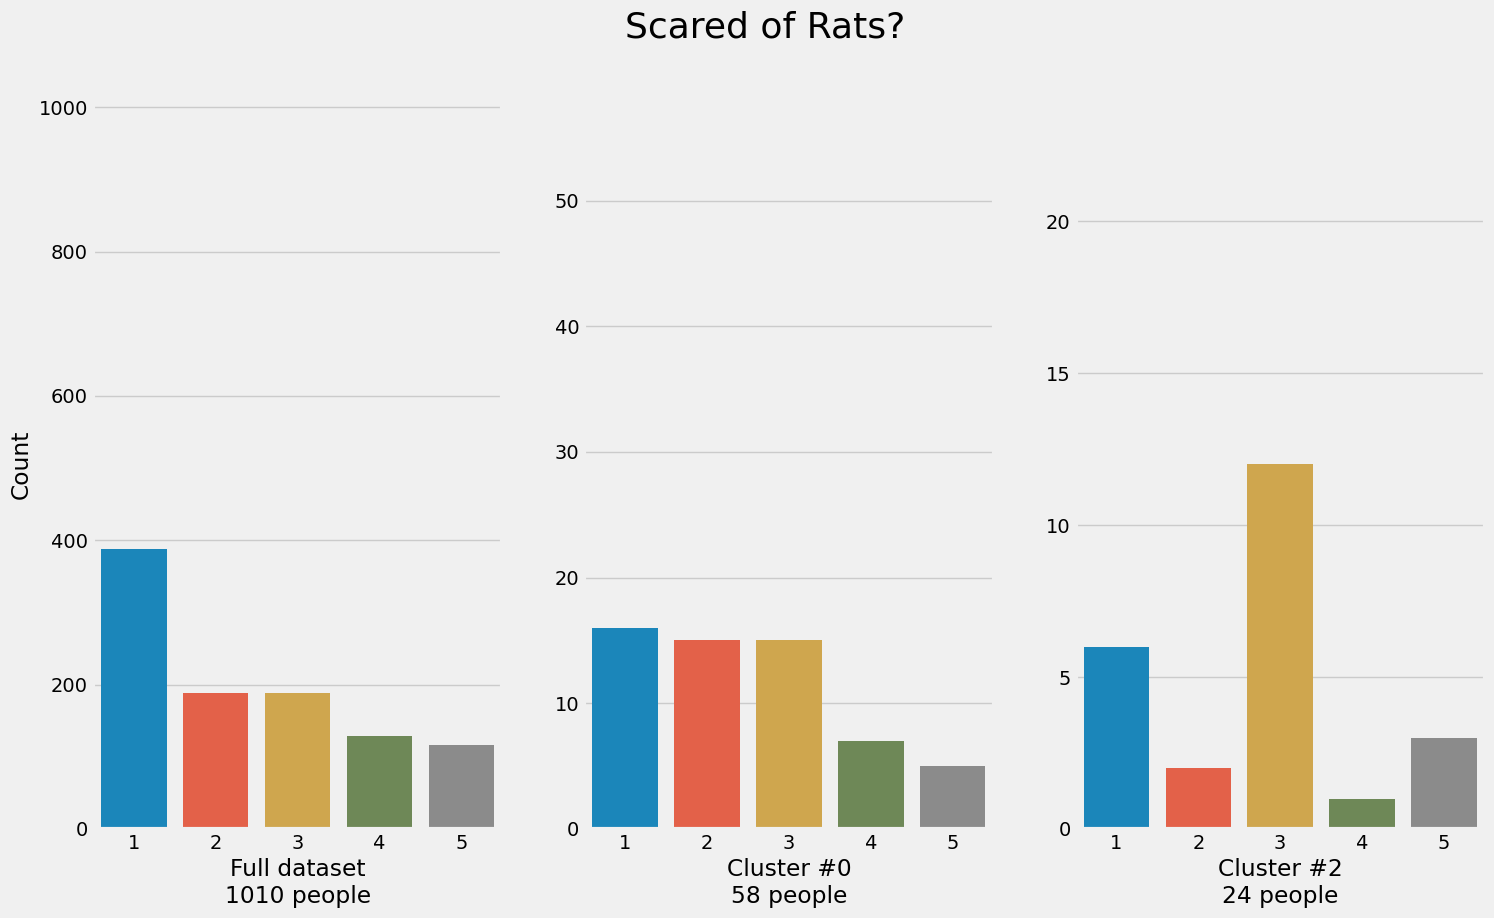

In [18]:
fig, ax = plt.subplots(1, 3, figsize=FIGSIZE, sharey=False)
x = "Rats"

fig.suptitle("Scared of Rats?", fontsize=26)
sns.countplot(ax=ax[0], data=df, x=x)
sns.countplot(ax=ax[1], data=df[df["cluster"] == 0], x=x)
sns.countplot(ax=ax[2], data=df[df["cluster"] == 2], x=x)

ax[0].set_xlabel(f"Full dataset\n{len(df)} people")
ax[1].set_xlabel(f"Cluster #0\n{58} people")
ax[2].set_xlabel(f"Cluster #2\n{24} people")

ax[0].set_ylabel("Count")
ax[1].set_ylabel("")
ax[2].set_ylabel("")

ax[0].set_ylim(0, len(df))
ax[1].set_ylim(0, len(df[df["cluster"] == 0]))
ax[2].set_ylim(0, len(df[df["cluster"] == 2]))

plt.show()

More than half of cluster #2 is scared of rats!

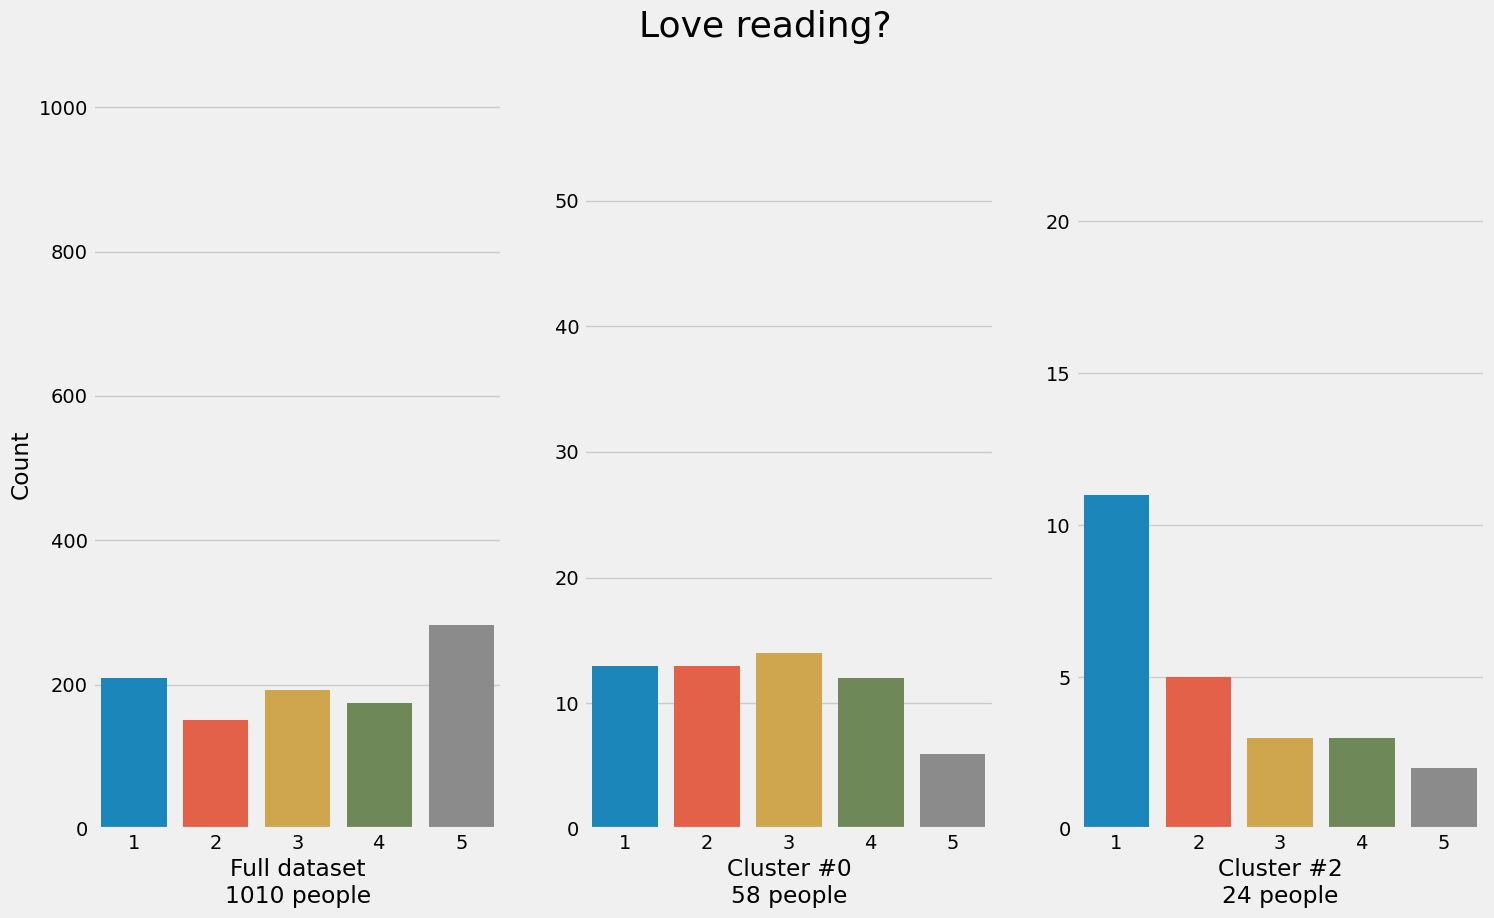

In [19]:
fig, ax = plt.subplots(1, 3, figsize=FIGSIZE, sharey=False)
x = "Reading"

fig.suptitle("Love reading?", fontsize=26)
sns.countplot(ax=ax[0], data=df, x=x)
sns.countplot(ax=ax[1], data=df[df["cluster"] == 0], x=x)
sns.countplot(ax=ax[2], data=df[df["cluster"] == 2], x=x)

ax[0].set_xlabel(f"Full dataset\n{len(df)} people")
ax[1].set_xlabel(f"Cluster #0\n{58} people")
ax[2].set_xlabel(f"Cluster #2\n{24} people")

ax[0].set_ylabel("Count")
ax[1].set_ylabel("")
ax[2].set_ylabel("")

ax[0].set_ylim(0, len(df))
ax[1].set_ylim(0, len(df[df["cluster"] == 0]))
ax[2].set_ylim(0, len(df[df["cluster"] == 2]))

plt.show()

If you're in cluster #2, you hate reading.

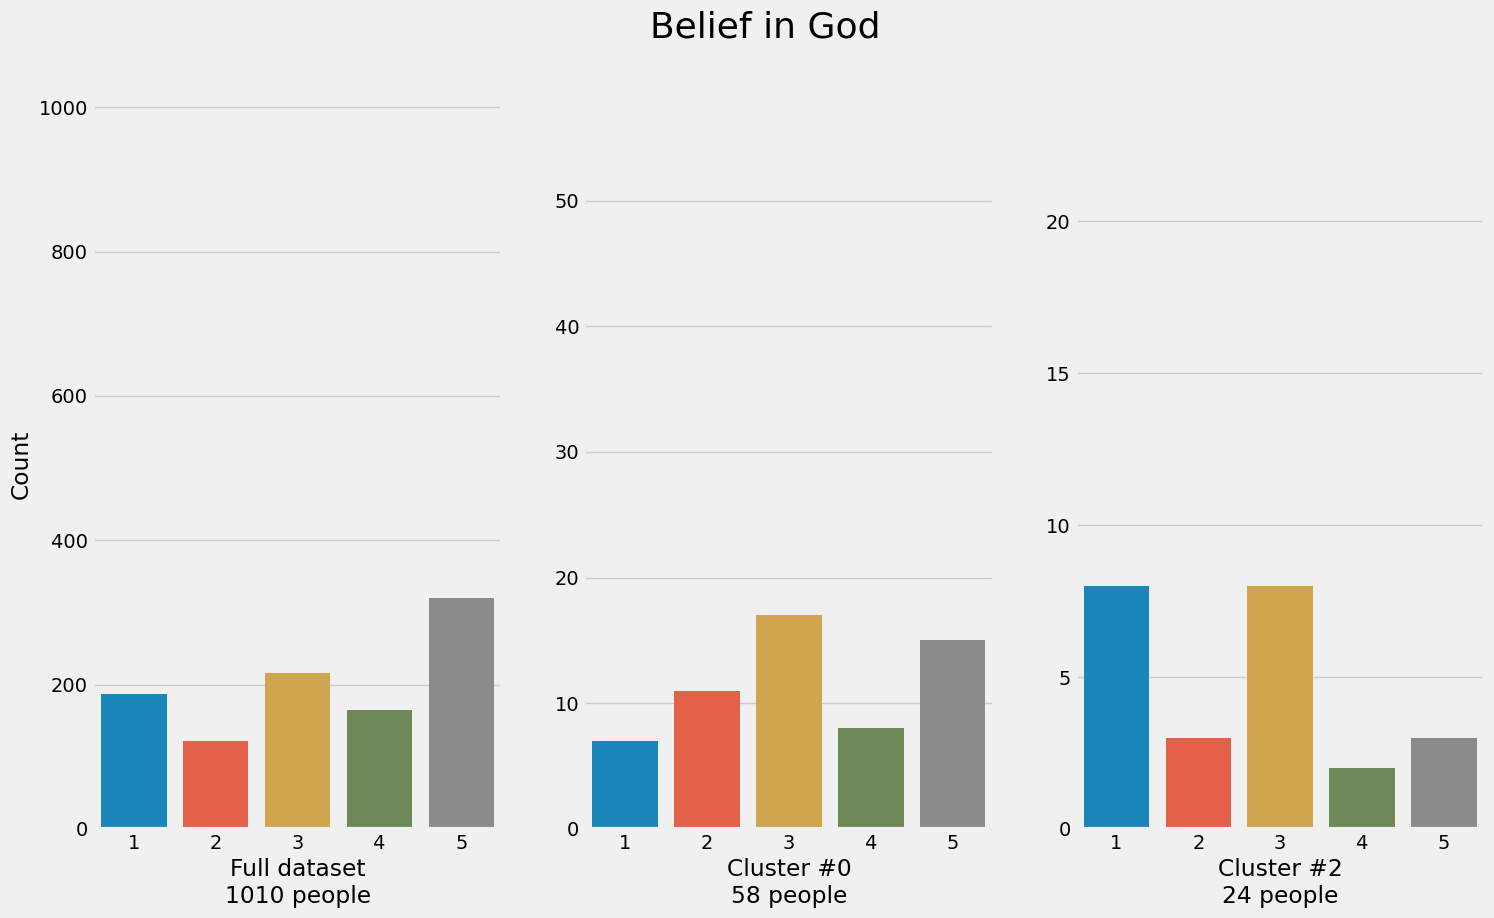

In [20]:
fig, ax = plt.subplots(1, 3, figsize=FIGSIZE, sharey=False)
x = "God"

fig.suptitle("Belief in God", fontsize=26)
sns.countplot(ax=ax[0], data=df, x=x)
sns.countplot(ax=ax[1], data=df[df["cluster"] == 0], x=x)
sns.countplot(ax=ax[2], data=df[df["cluster"] == 2], x=x)

ax[0].set_xlabel(f"Full dataset\n{len(df)} people")
ax[1].set_xlabel(f"Cluster #0\n{58} people")
ax[2].set_xlabel(f"Cluster #2\n{24} people")

ax[0].set_ylabel("Count")
ax[1].set_ylabel("")
ax[2].set_ylabel("")

ax[0].set_ylim(0, len(df))
ax[1].set_ylim(0, len(df[df["cluster"] == 0]))
ax[2].set_ylim(0, len(df[df["cluster"] == 2]))

plt.show()

The young population, in general, has mixed religious beliefs. But cluster #2 is relatively atheistic.

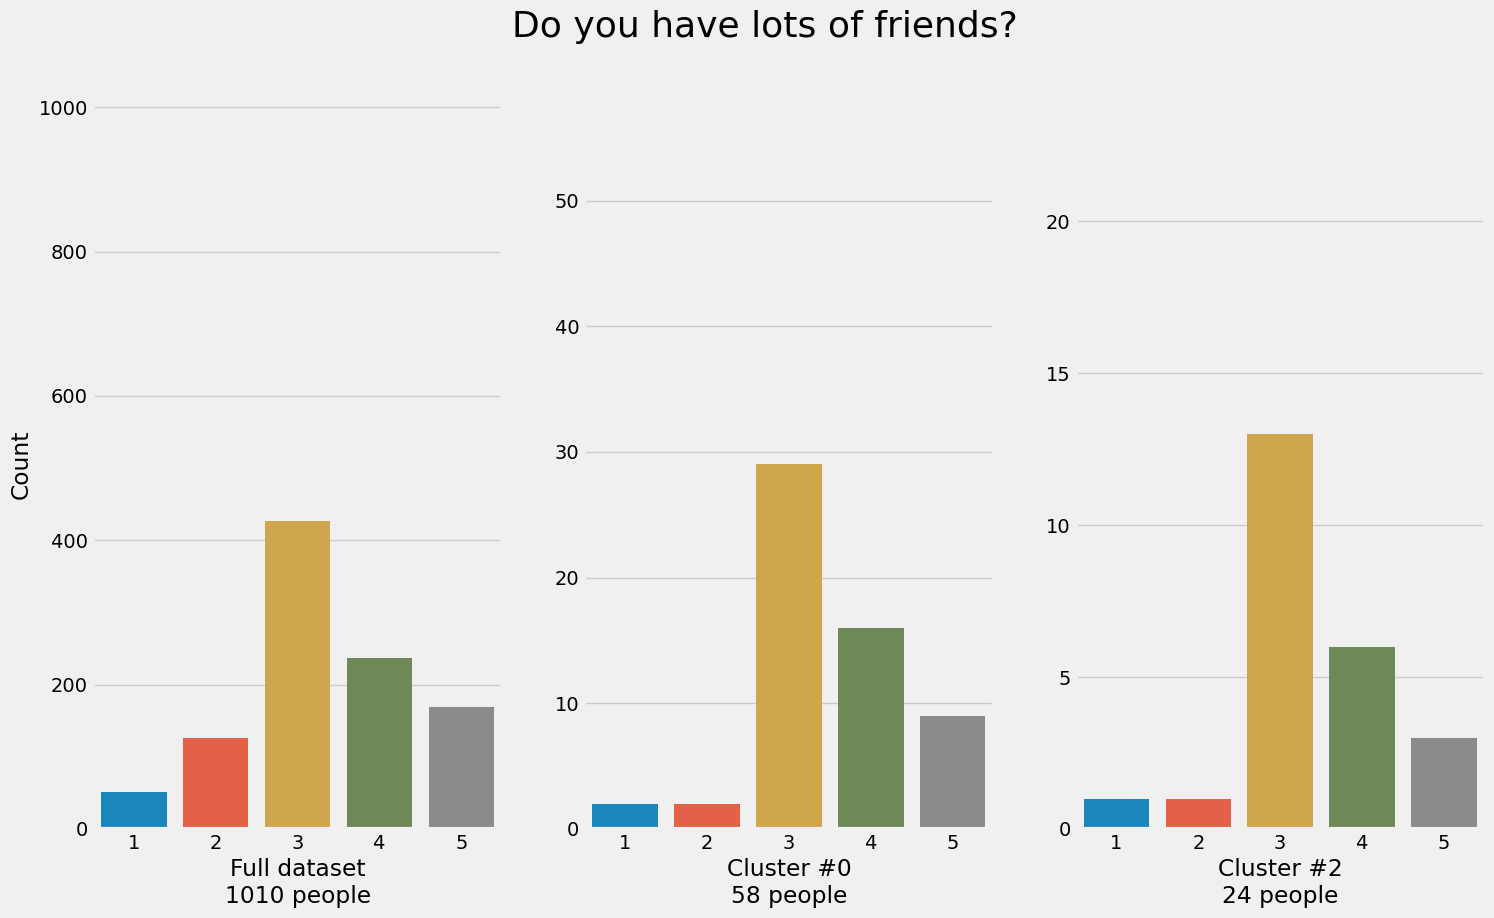

In [21]:
fig, ax = plt.subplots(1, 3, figsize=FIGSIZE, sharey=False)
x = "Number of friends"

fig.suptitle("Do you have lots of friends?", fontsize=26)
sns.countplot(ax=ax[0], data=df, x=x)
sns.countplot(ax=ax[1], data=df[df["cluster"] == 0], x=x)
sns.countplot(ax=ax[2], data=df[df["cluster"] == 2], x=x)

ax[0].set_xlabel(f"Full dataset\n{len(df)} people")
ax[1].set_xlabel(f"Cluster #0\n{58} people")
ax[2].set_xlabel(f"Cluster #2\n{24} people")

ax[0].set_ylabel("Count")
ax[1].set_ylabel("")
ax[2].set_ylabel("")

ax[0].set_ylim(0, len(df))
ax[1].set_ylim(0, len(df[df["cluster"] == 0]))
ax[2].set_ylim(0, len(df[df["cluster"] == 2]))

plt.show()

We see similar behavior across the clusters.

## Concluding remarks

The above plots are a small subset of the available behaviors. As we've seen, some behaviors are surprisingly linked, like music preference and fear of rats. While others, like how many friends one has, isn't related to a person's music preference.

However, we must keep in mind that almost 90% of the population remained unclustered. This implies that people have varied music preferences, and only for a select few people can we derive their behavior from their musical taste.